In [ ]:
# Nash Cascade Neural Network
# A hydrologically intuitive deep learning network

# Set up a solution to a network of buckets where the number of buckets in each layer
# flows out to the buckets in the next layer
# The parameter on each bucket is the size and height of each spigot.

# Need a function that solves this individually at a single buckets
# Then a function that loops through and moves the water to the downstream buckets

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ncnn import NashCascadeNeuralNetwork as ncnn
# Precipitation standard variable name used in the ncnn model interface
PRECIP_SVN = "atmosphere_water__liquid_equivalent_precipitation_rate"
DO_PLOT = True
N_TIMESTEPS = 500

In [2]:
network_precip_input_list = []
count = 0
for i in range(N_TIMESTEPS):

    ###########################################################################
    if count > 39:
        network_precip_input_list.append(1)
    else:
        network_precip_input_list.append(0)
    if count == 50:
        count = 0
    count+=1
    ###########################################################################


In [3]:
bucket_net = ncnn(cfg_file="./config_0.json")
bucket_net.initialize()

Initial Mass in network at start: 32.0
Final Mass in network: 10.4
Total Mass out of network 130.6
Total precipitation into network 109.0
Final mass balance is 0.000
Final mass balance is 0.000


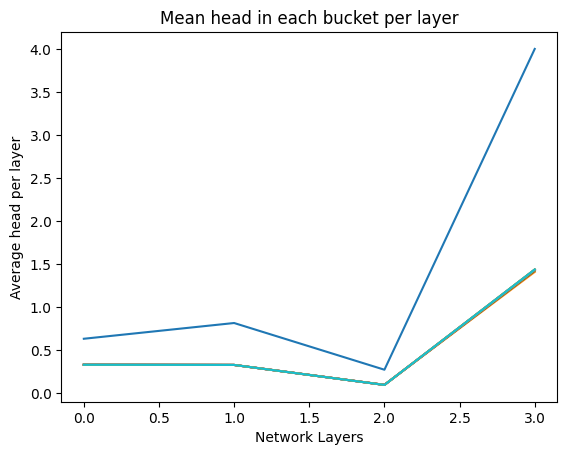

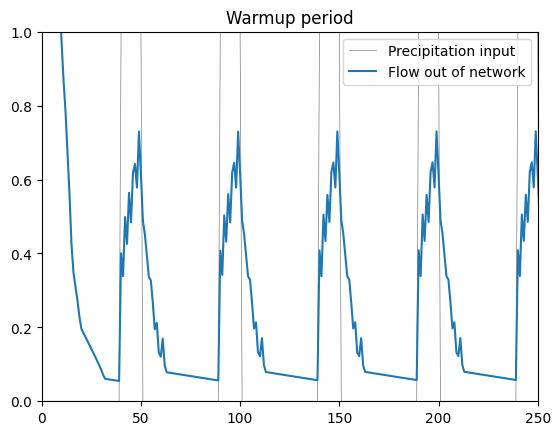

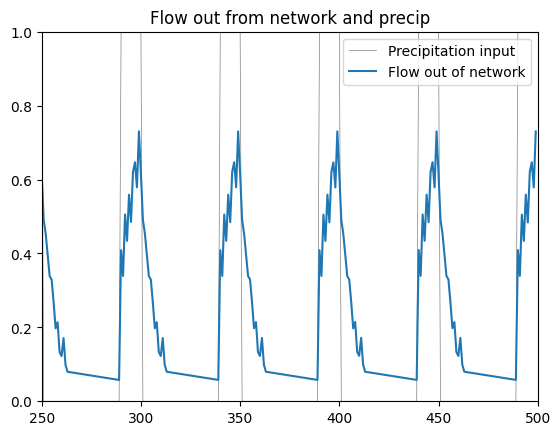

In [4]:
# Example 0
bucket_net = ncnn(cfg_file="./config_0.json")
bucket_net.initialize()
bucket_net.summarize_network()
inital_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
print(f"Initial Mass in network at start: {inital_mass_in_network:.1f}")
network_outflow_list_0 = []
for i in range(N_TIMESTEPS):

    ###########################################################################
    ###########################################################################
    bucket_net.set_value(PRECIP_SVN, np.array(network_precip_input_list[i]))
    bucket_net.update_network()
    network_outflow_list_0.append(bucket_net.network_outflow.item())
    bucket_net.summarize_network()
    ###########################################################################
    ###########################################################################

    if DO_PLOT:
        if i % int(N_TIMESTEPS/10) == 0:
            plt.plot([tensor.item() for tensor in bucket_net.mean_H_per_layer])

###########################################################################
total_mass_precip_in = np.sum(np.array(network_precip_input_list))
final_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
total_mass_outflow = np.sum(network_outflow_list_0)
print(f"Final Mass in network: {final_mass_in_network:.1f}")
print(f"Total Mass out of network {total_mass_outflow:.1f}")
print(f"Total precipitation into network {total_mass_precip_in:.1f}")
mass_balance = (inital_mass_in_network + total_mass_precip_in) - (final_mass_in_network + total_mass_outflow)
print(f"Final mass balance is {mass_balance:.3f}")
mass_balance = (inital_mass_in_network - final_mass_in_network) - (total_mass_outflow - total_mass_precip_in)
print(f"Final mass balance is {mass_balance:.3f}")
if DO_PLOT:
    plt.title("Mean head in each bucket per layer")
    plt.ylabel("Average head per layer")
    plt.xlabel("Network Layers")
    plt.show()
    plt.close()

if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_0)-(len(network_outflow_list_0)/2))
    endplt = int(len(network_outflow_list_0))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

Initial Mass in network at start: 32.0
Final Mass in network: 6.4
Total Mass out of network 134.6
Total precipitation into network 109.0
Final mass balance is -0.000
Final mass balance is -0.000


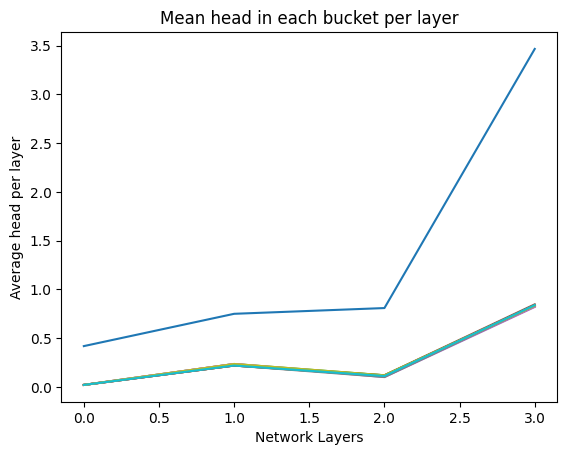

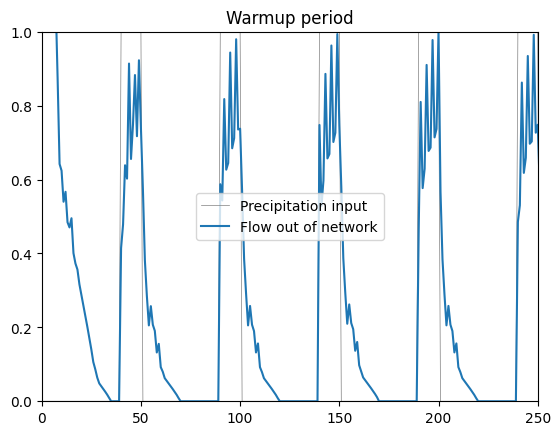

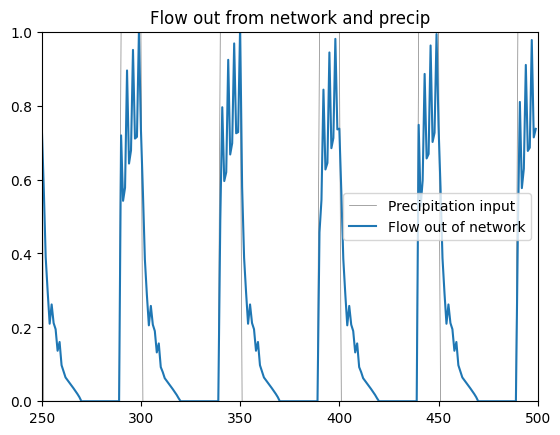

In [5]:
# Example 1
bucket_net = ncnn(cfg_file="./config_1.json")
bucket_net.initialize()
bucket_net.summarize_network()
inital_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
print(f"Initial Mass in network at start: {inital_mass_in_network:.1f}")
network_outflow_list_1 = []
for i in range(N_TIMESTEPS):

    ###########################################################################
    ###########################################################################
    bucket_net.set_value(PRECIP_SVN, np.array(network_precip_input_list[i]))
    bucket_net.update_network()
    network_outflow_list_1.append(bucket_net.network_outflow.item())
    bucket_net.summarize_network()
    ###########################################################################
    ###########################################################################

    if DO_PLOT:
        if i % int(N_TIMESTEPS/10) == 0:
            plt.plot([tensor.item() for tensor in bucket_net.mean_H_per_layer])

###########################################################################
total_mass_precip_in = np.sum(np.array(network_precip_input_list))
final_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
total_mass_outflow = np.sum(network_outflow_list_1)
print(f"Final Mass in network: {final_mass_in_network:.1f}")
print(f"Total Mass out of network {total_mass_outflow:.1f}")
print(f"Total precipitation into network {total_mass_precip_in:.1f}")
mass_balance = (inital_mass_in_network + total_mass_precip_in) - (final_mass_in_network + total_mass_outflow)
print(f"Final mass balance is {mass_balance:.3f}")
mass_balance = (inital_mass_in_network - final_mass_in_network) - (total_mass_outflow - total_mass_precip_in)
print(f"Final mass balance is {mass_balance:.3f}")
if DO_PLOT:
    plt.title("Mean head in each bucket per layer")
    plt.ylabel("Average head per layer")
    plt.xlabel("Network Layers")
    plt.show()
    plt.close()

if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_1, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_1)-(len(network_outflow_list_1)/2))
    endplt = int(len(network_outflow_list_1))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_1, label="Flow out of network")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

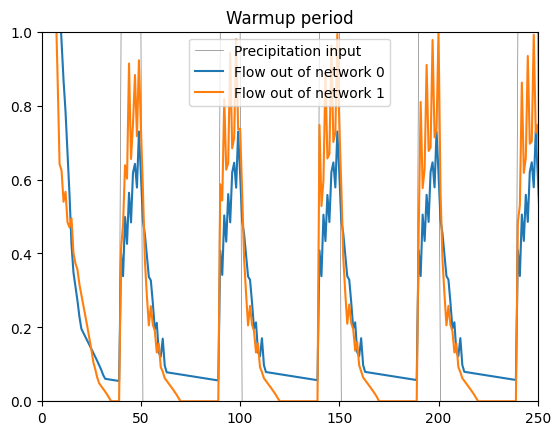

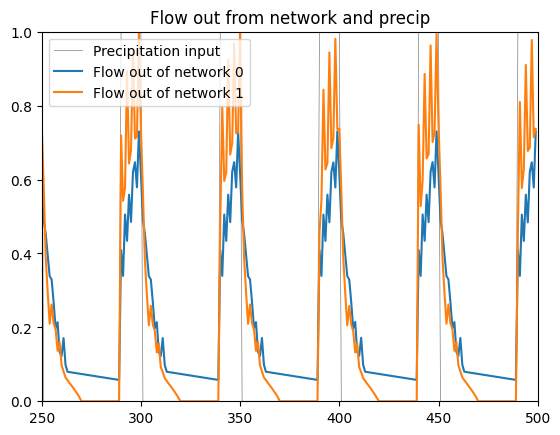

In [6]:
if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_1)-(len(network_outflow_list_1)/2))
    endplt = int(len(network_outflow_list_1))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()

In [10]:
# Example 1
bucket_net = ncnn(cfg_file="./config_1.json")
bucket_net.initialize()
optim = torch.optim.SGD([bucket_net.theta],lr=10e-1)
bucket_net.summarize_network()
inital_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
print(f"Initial Mass in network at start: {inital_mass_in_network:.1f}")

for epoch in range(2):
    network_outflow_list_1 = []
    bucket_net.initialize_bucket_head_level()
    for i in range(N_TIMESTEPS):

        ###########################################################################
        ###########################################################################
        bucket_net.set_value(PRECIP_SVN, np.array(network_precip_input_list[i]))
        bucket_net.update_network()
        network_outflow_list_1.append(bucket_net.network_outflow.item())
        bucket_net.summarize_network()
        ###########################################################################
        ###########################################################################

    err = (torch.tensor(network_outflow_list_0, requires_grad=True) - torch.tensor(network_outflow_list_1, requires_grad=True))
    loss = err.pow(2.0).mean() # mean squared error
    loss.backward() # run backpropagation

    optim.step() # update the parameters, just like w -= learning_rate * w.grad
    optim.zero_grad()

    print(f"loss is: {loss}, theta[0][0][0] is: {bucket_net.theta[0][0][0]}")

    ###########################################################################
    total_mass_precip_in = np.sum(np.array(network_precip_input_list))
    final_mass_in_network = np.sum([tensor.item() for tensor in bucket_net.sum_H_per_layer])
    total_mass_outflow = np.sum(network_outflow_list_1)
    print(f"Final Mass in network: {final_mass_in_network:.1f}")
    print(f"Total Mass out of network {total_mass_outflow:.1f}")
    print(f"Total precipitation into network {total_mass_precip_in:.1f}")
    mass_balance = (inital_mass_in_network + total_mass_precip_in) - (final_mass_in_network + total_mass_outflow)
    print(f"Final mass balance is {mass_balance:.3f}")
    mass_balance = (inital_mass_in_network - final_mass_in_network) - (total_mass_outflow - total_mass_precip_in)
    print(f"Final mass balance is {mass_balance:.3f}")


Initial Mass in network at start: 32.0
loss is: 0.024344654753804207, theta[0][0][0] is: 0.11381246894598007
Final Mass in network: 6.4
Total Mass out of network 134.6
Total precipitation into network 109.0
Final mass balance is -0.000
Final mass balance is -0.000
loss is: 0.024344654753804207, theta[0][0][0] is: 0.11381246894598007
Final Mass in network: 6.4
Total Mass out of network 134.6
Total precipitation into network 109.0
Final mass balance is -0.000
Final mass balance is -0.000


In [ ]:
if DO_PLOT:
    startplt = 0
    endplt = 250

    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Warmup period")
    plt.show()
    plt.close()
    startplt = int(len(network_outflow_list_1)-(len(network_outflow_list_1)/2))
    endplt = int(len(network_outflow_list_1))
    plt.plot(network_precip_input_list, c="grey", lw=0.5, label="Precipitation input")
    plt.plot(network_outflow_list_0, label="Flow out of network 0")
    plt.plot(network_outflow_list_1, label="Flow out of network 1")
    plt.xlim([startplt, endplt])
    plt.ylim([0, np.max(np.array(network_precip_input_list)[startplt:endplt])])
    plt.legend()
    plt.title("Flow out from network and precip")
    plt.show()
    plt.close()